In [1]:
%matplotlib inline
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.io import loadmat
from sklearn import decomposition

from aux import get_seg
from record_0_main import smlt_ma, smlt_lnma
from disp import set_plot, plot_b


EXPT_DIR = 'data/original/pacheco_neur'
# MAT_FILE = 'median_auditory_responses_wildtype.mat'
MAT_FILE = 'median_auditory_responses_wildtype_plus_naturalsong.mat'

In [2]:
temp = loadmat(os.path.join(EXPT_DIR, MAT_FILE))['dataset']
d = dict(zip([k for k, v in temp.dtype.descr], temp[0, 0]))
print(d.keys())

dict_keys(['description', 'median_z_scored_signal_per_roi', 'median_dfof_signal_per_roi', 'timestamps', 'stimuli_index_vector', 'stimuli_name_string', 'response_type_label_per_roi', 'neuropil_index_per_roi', 'neuropil_full_names', 'fly_index_per_roi', 'sex_index_per_roi', 'sex_full_name_string'])


In [3]:
print(d['median_z_scored_signal_per_roi'].shape)  # num rois (aggregated over flies) x num timesteps
med_rsp = d['median_z_scored_signal_per_roi']

(2258, 244)


In [4]:
d['timestamps'].shape

(1, 244)

In [5]:
t_orig = d['timestamps'].flatten()
print(t_orig)

DT = 0.5

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12.   12.5  13.   13.5
  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.   18.5  19.   19.5
  20.  -10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.
  -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.
   1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.
   7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12.   12.5  13.
  13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.   18.5  19.
  19.5  20.  -10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5
  -5.   -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5
   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5
   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   

In [6]:
stim_index = d['stimuli_index_vector'].flatten()
stim_index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [7]:
d['stimuli_name_string']

array([[array(['Pulse'], dtype='<U5')],
       [array(['Sine'], dtype='<U4')],
       [array(['White Noise'], dtype='<U11')],
       [array(['Natural Song'], dtype='<U12')]], dtype=object)

In [8]:
print(d['neuropil_full_names'].shape)
npl_names = d['neuropil_full_names'].flatten()
d['neuropil_full_names']

(41, 1)


array([[array(['AMMC'], dtype='<U4')],
       [array(['SAD'], dtype='<U3')],
       [array(['GNG'], dtype='<U3')],
       [array(['WED'], dtype='<U3')],
       [array(['AVLP'], dtype='<U4')],
       [array(['PVLP'], dtype='<U4')],
       [array(['PLP'], dtype='<U3')],
       [array(['AOTU'], dtype='<U4')],
       [array(['AL'], dtype='<U2')],
       [array(['MB_VL'], dtype='<U5')],
       [array(['MB_ML'], dtype='<U5')],
       [array(['MB_PED'], dtype='<U6')],
       [array(['MB_CA'], dtype='<U5')],
       [array(['LH'], dtype='<U2')],
       [array(['EB'], dtype='<U2')],
       [array(['FB'], dtype='<U2')],
       [array(['PB'], dtype='<U2')],
       [array(['NO'], dtype='<U2')],
       [array(['BU'], dtype='<U2')],
       [array(['LAL'], dtype='<U3')],
       [array(['SLP'], dtype='<U3')],
       [array(['SIP'], dtype='<U3')],
       [array(['SMP'], dtype='<U3')],
       [array(['CRE'], dtype='<U3')],
       [array(['SCL'], dtype='<U3')],
       [array(['ICL'], dtype='<U3')],
      

In [9]:
stims = [None] + [stim[0] for stim in d['stimuli_name_string'].flatten()]
n_stim = len(stims)-1

bds = [None]

for istim in range(1, len(stims)):
    segs, bds_seg = get_seg(stim_index==istim, min_gap=1)
    bds.append(bds_seg[0])
    
print(stims)
print(bds)

[None, 'Pulse', 'Sine', 'White Noise', 'Natural Song']
[None, array([20, 41]), array([ 81, 102]), array([142, 163]), array([203, 224])]


In [10]:
flies = np.unique(d['fly_index_per_roi'])
mflys = [(d['fly_index_per_roi'] == fly).flatten() for fly in flies]

expts = []
npl_idxs = []

for fly, mfly in zip(flies, mflys):
    print(f'Fly {fly}: {mfly.sum()} rois')
    expts.append(med_rsp[mfly, :])
    npl_idxs.append(d['neuropil_index_per_roi'].flatten()[mfly])
    
print()

for fly, expt in zip(flies, expts):
    print(f'Fly {fly}: {expt.shape}')

Fly 38: 210 rois
Fly 39: 697 rois
Fly 40: 382 rois
Fly 41: 948 rois
Fly 42: 21 rois

Fly 38: (210, 244)
Fly 39: (697, 244)
Fly 40: (382, 244)
Fly 41: (948, 244)
Fly 42: (21, 244)


In [11]:
# fly_rois = [
#     (38, 12),
#     (38, 90),
#     (38, 126),
#     (38, 139),
#     (38, 153),
#     (38, 164),
#     (38, 194),
#     (38, 198),
    
#     (39, 8),
#     (39, 9),
#     (39, 13),
#     (39, 24),
#     (39, 45),
#     (39, 56),
#     (39, 106),
#     (39, 107),
#     (39, 117),
#     (39, 122),
    
#     (40, 149),
# ]

fly_rois = [
    # (40, 149),
    (39, 117),
    (38, 198),
    (38, 164),
    (38, 12),
    (39, 24),
]

labels = []
rsps = []
t = -10 + np.arange(len(d['timestamps'].flatten()))*.5
for ifly in range(len(flies)):

    for ctr in range(200):
        if (flies[ifly], ctr) in fly_rois:
            rsps.append(expts[ifly][ctr, :])
            # labels.append(f'{npl_names[npl_idxs[ifly][ctr]][0]} ({flies[ifly]}:{ctr})')
            labels.append(f'{npl_names[npl_idxs[ifly][ctr]][0]}')  # ({flies[ifly]}:{ctr})')

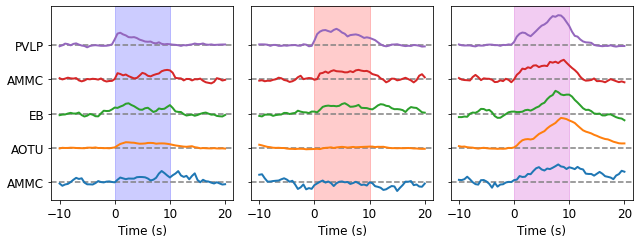

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(9, .7*len(fly_rois)), sharey=True, tight_layout=True)

y_ticks = []

for crsp, (rsp, label) in enumerate(zip(rsps, labels)):
    y_off = crsp
    y_ticks.append(y_off)
    for bd, ax, color in zip([bds[2], bds[1], bds[4]], axs, ['b', 'r', 'm']):
        ax.axhline(y_off, c='gray', ls='--')
        temp = rsp[bd[0]-20:bd[1]+20]
        t_temp = np.arange(len(temp))*DT - 10
        ax.plot(t_temp, (temp-np.mean(temp[t_temp < 0]))*.2 + y_off, lw=2)
        
for ax in axs:
    set_plot(ax, x_label='Time (s)')
    
axs[0].axvspan(0, 10, color='b', alpha=.2)
axs[1].axvspan(0, 10, color='r', alpha=.2)
axs[2].axvspan(0, 10, color='m', alpha=.2)

set_plot(axs[0], y_ticks=y_ticks, y_tick_labels=labels)

In [13]:
rsps_lnma = []
t = np.arange(-10, 20, .03)
i_s_i_p_s = [
    ((0 <= t) & (t < 10)).astype(float), np.zeros(len(t)),
]
i_s_i_p_p = [
    np.zeros(len(t)), ((0 <= t) & (t < 10)).astype(float),
]

# make natural song
i_s_nat = ((0 <= t) & (t < 10)).astype(float)
i_p_nat = np.zeros(len(t)).astype(float)

# pulse boundaries from Dpacheco nat song stim
bds_p = [(3.5, 3.625), (4.05, 4.18), (4.68, 4.75), (5.15, 5.2), (5.58, 5.7), (6.02, 6.85), (7.69, 8.46), (9.16, 9.71)]

for t_start, t_stop in bds_p:
    mt = (t_start <= t) & (t < t_stop)
    i_s_nat[mt] = 0
    i_p_nat[mt] = 1
    
i_s_i_p_nat = [i_s_nat, i_p_nat]

In [14]:
# params = {
#     'TAU_R': np.array([7, 6, 4, 2.5, 3, 8]),
#     'TAU_A': np.array([.5, .2, .4, 3.5, 1.8, 4]),
#     'X_S': np.array([3, 6, 2, .6, 1.3, 2]),
#     'X_P': np.array([1, 3, 2.5, .9, 2, .5]),
# }
params = {
    'TAU_R': np.array([7, 6, 4, 2.5, 3]),
    'TAU_A': np.array([.5, .2, .4, 3.5, 1.8]),
    'X_S': np.array([3, 6, 2, .6, 1.3]),
    'X_P': np.array([1, 3, 2.5, .9, 2]),
}

rs_s = smlt_lnma(*i_s_i_p_s, params, dt=0.03)
rs_p = smlt_lnma(*i_s_i_p_p, params, dt=0.03)
rs_nat = smlt_lnma(*i_s_i_p_nat, params, dt=0.03)

rs_all = [rs_s, rs_p, rs_nat]

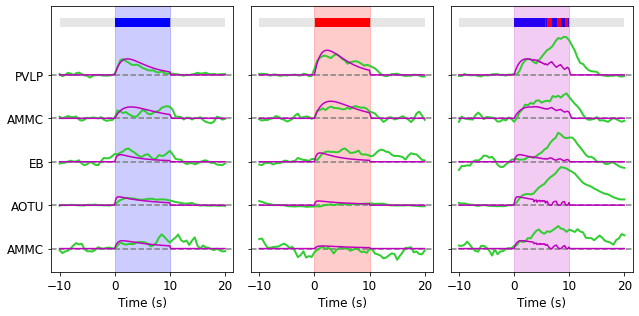

In [15]:
rs_s = smlt_lnma(*i_s_i_p_s, params, dt=0.03)
rs_p = smlt_lnma(*i_s_i_p_p, params, dt=0.03)
rs_nat = smlt_lnma(*i_s_i_p_nat, params, dt=0.03)

rs_all = [rs_s, rs_p, rs_nat]

fig, axs = plt.subplots(1, 3, figsize=(9, .9*len(fly_rois)), sharey=True, tight_layout=True)

y_ticks = []

for crsp, (rsp, label) in enumerate(zip(rsps, labels)):
    y_off = crsp
    y_ticks.append(y_off)
    for cstim in range(3):
        bd = [bds[2], bds[1], bds[4]][cstim]
        ax = axs[cstim]
        color = ['b', 'r', 'm'][cstim]
        ax.axhline(y_off, c='gray', ls='--')
        temp = rsp[bd[0]-20:bd[1]+20]
        t_temp = np.arange(len(temp))*DT - 10
        rsp_ = (temp-np.mean(temp[t_temp < 0]))
        
        if crsp == 2 and cstim == 2:
            rsp_ = np.roll(rsp_, 1)
        elif crsp == 3 and cstim == 1:
            rsp_ = np.roll(rsp_, -1)
        elif crsp == 3 and cstim == 2:
            rsp_ = np.roll(rsp_, 1)
        elif crsp == 4 and cstim == 0:
            rsp_ = np.roll(rsp_, 1)
        elif crsp == 4 and cstim == 2:
            rsp_ = np.roll(rsp_, 2)
        elif crsp == 5 and cstim == 0:
            rsp_ = np.roll(rsp_, -2)
        elif crsp == 5 and cstim == 2:
            rsp_ = np.roll(rsp_, 2)
        ax.plot(t_temp, rsp_*.2 + y_off, lw=2, c='limegreen')
        ax.plot(t, rs_all[cstim][:, crsp] + y_off, c='m')
        
i_s_i_p_all = [i_s_i_p_s, i_s_i_p_p, i_s_i_p_nat]
for ax, (i_s, i_p) in zip(axs, i_s_i_p_all):
    set_plot(ax, x_label='Time (s)')
    b = np.zeros(len(t))
    b[i_s == 1] = 1
    b[i_p == 1] = 2
    plot_b(ax, t, b, extent=[-10, 20, 5.1, 5.3], c=[(.9, .9, .9), 'b', 'r'])
    
axs[0].axvspan(0, 10, color='b', alpha=.2)
axs[1].axvspan(0, 10, color='r', alpha=.2)
axs[2].axvspan(0, 10, color='m', alpha=.2)

set_plot(axs[0], y_ticks=y_ticks, y_tick_labels=labels)